## Importing Libraries

In [99]:
import re
import csv
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
nltk.download('stopwords')
from nltk.util import ngrams
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Deeksha
[nltk_data]     Kotian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
data=pd.read_csv('email.txt')

In [55]:
data.head()

Unnamed: 0                  filename  \
0           0   arnold-j/_sent_mail/34.   
1           1  arnold-j/_sent_mail/517.   
2           2  arnold-j/_sent_mail/743.   
3           3  arnold-j/_sent_mail/766.   
4           4  arnold-j/_sent_mail/797.   

                                      Message-ID  \
0  <15267340.1075857594923.JavaMail.evans@thyme>   
1  <15539583.1075857652152.JavaMail.evans@thyme>   
2   <4339799.1075857657711.JavaMail.evans@thyme>   
3  <25574783.1075857658215.JavaMail.evans@thyme>   
4  <19506151.1075857658895.JavaMail.evans@thyme>   

                                             content    Class  
0  eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...  Abusive  
1                                           fuck you  Abusive  
2  Gentlemen:\nThe following champagne is availab...  Abusive  
3  sorry i've taken so long...just been trying to...  Abusive  
4  asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...  Abusive

## EDA

In [56]:
len(data)

48076

In [57]:
data['Class'].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

In [58]:
df=data.copy()

In [59]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [60]:
df.head()

filename                                     Message-ID  \
0   arnold-j/_sent_mail/34.  <15267340.1075857594923.JavaMail.evans@thyme>   
1  arnold-j/_sent_mail/517.  <15539583.1075857652152.JavaMail.evans@thyme>   
2  arnold-j/_sent_mail/743.   <4339799.1075857657711.JavaMail.evans@thyme>   
3  arnold-j/_sent_mail/766.  <25574783.1075857658215.JavaMail.evans@thyme>   
4  arnold-j/_sent_mail/797.  <19506151.1075857658895.JavaMail.evans@thyme>   

                                             content    Class  
0  eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...  Abusive  
1                                           fuck you  Abusive  
2  Gentlemen:\nThe following champagne is availab...  Abusive  
3  sorry i've taken so long...just been trying to...  Abusive  
4  asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...  Abusive

In [61]:
df.isnull().sum()

filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    48076 non-null  object
 1   Message-ID  48076 non-null  object
 2   content     48076 non-null  object
 3   Class       48076 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [63]:
df

filename  \
0          arnold-j/_sent_mail/34.   
1         arnold-j/_sent_mail/517.   
2         arnold-j/_sent_mail/743.   
3         arnold-j/_sent_mail/766.   
4         arnold-j/_sent_mail/797.   
...                            ...   
48071  campbell-l/notes_inbox/133.   
48072  campbell-l/notes_inbox/134.   
48073  campbell-l/notes_inbox/135.   
48074  campbell-l/notes_inbox/136.   
48075  campbell-l/notes_inbox/137.   

                                          Message-ID  \
0      <15267340.1075857594923.JavaMail.evans@thyme>   
1      <15539583.1075857652152.JavaMail.evans@thyme>   
2       <4339799.1075857657711.JavaMail.evans@thyme>   
3      <25574783.1075857658215.JavaMail.evans@thyme>   
4      <19506151.1075857658895.JavaMail.evans@thyme>   
...                                              ...   
48071   <6503484.1075857876489.JavaMail.evans@thyme>   
48072  <17277180.1075857876513.JavaMail.evans@thyme>   
48073  <31066400.1075857876537.JavaMail.evans@thyme>   
48074  <26024436.1075857876659.JavaMail.evans@thyme>   
48075  <10677824.1075857876692.JavaMail.evans@thyme>   

                                                 content        Class  
0      eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...      Abusive  
1                                               fuck you      Abusive  
2      Gentlemen:\nThe following champagne is availab...      Abusive  
3      sorry i've taken so long...just been trying to...      Abusive  
4      asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...      Abusive  
...                                                  ...          ...  
48071  Dear Market Participants,\n\nPlease note the c...  Non Abusive  
48072  According to my fancy ciphering we made $310,0...  Non Abusive  
48073  BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...  Non Abusive  
48074  Welcome to: DIAMONDS NEWSLETTER         Issue:...  Non Abusive  
48075  ---------------------- Forwarded by Tamara Jae...  Non Abusive  

[48076 rows x 4 columns]

## Getting the users
 I have defined a function to get the names of the users.

In [64]:
def _User(txt):
    txt=txt.split('/')
    txt=txt[0].split('-')
    txt=txt[0].capitalize()
    return txt
df['User']=df['filename'].apply(_User)
df.drop('filename',axis=1,inplace=True)
df.head()

Message-ID  \
0  <15267340.1075857594923.JavaMail.evans@thyme>   
1  <15539583.1075857652152.JavaMail.evans@thyme>   
2   <4339799.1075857657711.JavaMail.evans@thyme>   
3  <25574783.1075857658215.JavaMail.evans@thyme>   
4  <19506151.1075857658895.JavaMail.evans@thyme>   

                                             content    Class    User  
0  eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...  Abusive  Arnold  
1                                           fuck you  Abusive  Arnold  
2  Gentlemen:\nThe following champagne is availab...  Abusive  Arnold  
3  sorry i've taken so long...just been trying to...  Abusive  Arnold  
4  asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...  Abusive  Arnold

## Obtaining the users who have sent the most abusive emails.

In [65]:
abusive=df[df['Class']=='Abusive']
abusive=pd.DataFrame(abusive['User'].value_counts()).reset_index().sort_values(by='User',ascending=False).head(20)
abusive.rename(columns={"index": "Names", "User": "Count"},inplace=True)
abusive

Names  Count
0    Lenhart    383
1     Rogers    230
2     Guzman    175
3       Bass    150
4       Mann    116
5    Germany    114
6    Dorland     99
7   Kaminski     96
8      Scott     85
9   Dasovich     79
10      Love     74
11  Rodrique     61
12    Fossum     61
13  Campbell     54
14    Linder     54
15     Giron     53
16       Gay     52
17     Nemec     48
18      Kean     46
19     Smith     44

C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Names', ylabel='Count'>

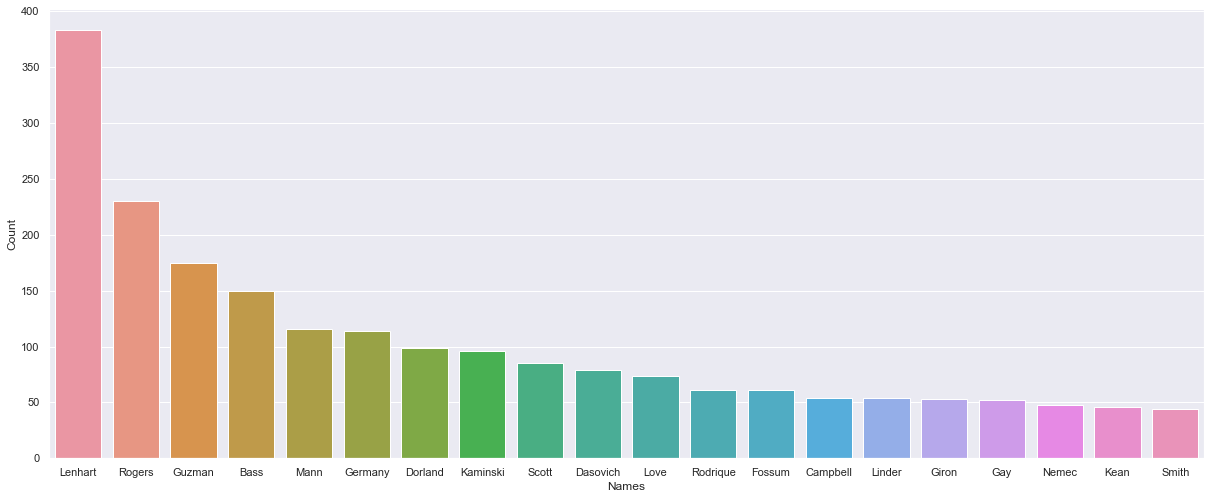

In [66]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot('Names','Count',data=abusive)

## Obtaining the users with most normal Emails:

In [67]:
non_abusive=df[df['Class']=='Non Abusive']
non_abusive=pd.DataFrame(non_abusive['User'].value_counts()).reset_index().sort_values(by='User',ascending=False).head(20)
non_abusive.rename(columns={"index": "Names", "User": "Count"},inplace=True)
non_abusive

Names  Count
0       Beck  11813
1       Bass   7673
2   Campbell   4967
3     Arnold   4861
4      Blair   3411
5      Allen   3034
6   Baughman   2739
7        Buy   2416
8    Brawner    988
9     Badeer    874
10    Benson    766
11     Arora    650
12    Bailey    474

C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Names', ylabel='Count'>

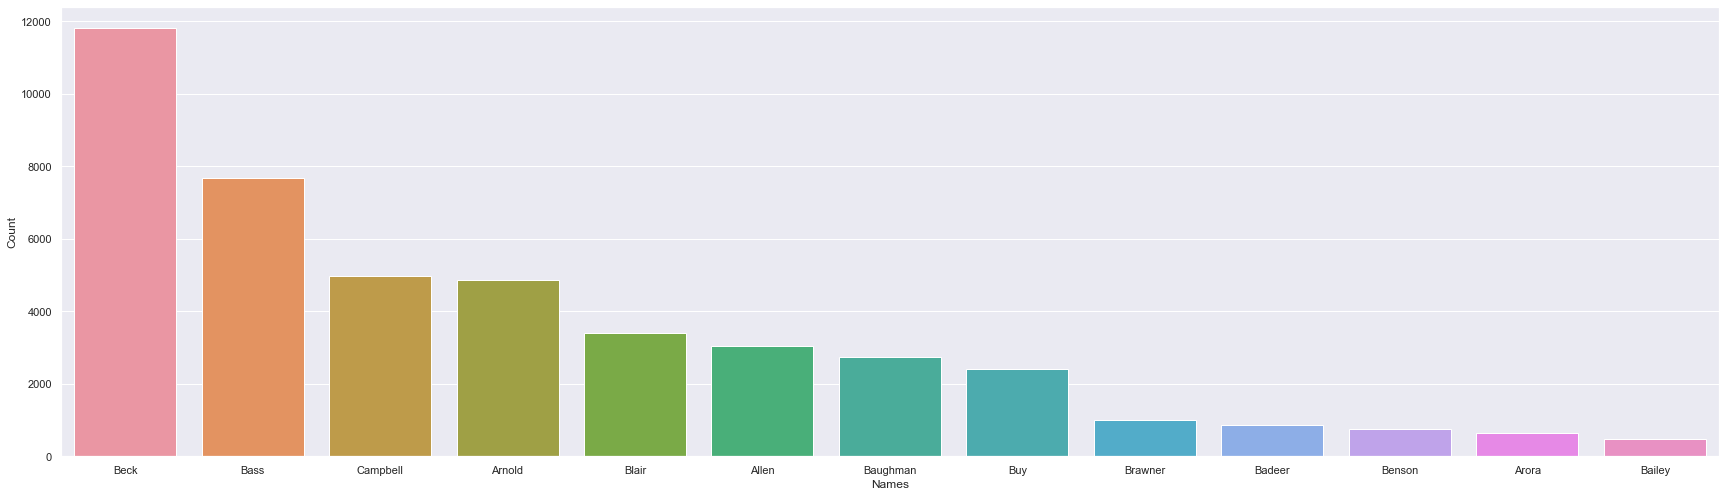

In [68]:
sns.set(rc={'figure.figsize':(29.7,8.27)})
sns.barplot('Names','Count',data=non_abusive)

## Text Cleaning:

In [108]:
lemmatizer = WordNetLemmatizer()
def clean_txt(review):
    review = re.sub('[\n@+]', ' ', review) #removing the special characters
    review = re.sub('(\d+[/]\d+[/]\d+)', ' ', review) #date
    review = re.sub(' (\d+[:]\d+) (AM|PM)', ' ', review) #time
    review = re.sub('[:#>=_-]', ' ', review)
    review = re.sub('excelr', ' ', review)
    review = re.sub('^[(http)(https)]://', ' ', review) #URL
    review = re.sub('cc', ' ', review)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [109]:
import nltk
nltk.download('wordnet')
df['Clean_txt']=df['content'].apply(clean_txt)
print(len(df['Clean_txt']))
df.head()

[nltk_data] Downloading package wordnet to C:\Users\Deeksha
[nltk_data]     Kotian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


48076


Message-ID  \
0  <15267340.1075857594923.JavaMail.evans@thyme>   
1  <15539583.1075857652152.JavaMail.evans@thyme>   
2   <4339799.1075857657711.JavaMail.evans@thyme>   
3  <25574783.1075857658215.JavaMail.evans@thyme>   
4  <19506151.1075857658895.JavaMail.evans@thyme>   

                                             content    Class    User  \
0  eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...  Abusive  Arnold   
1                                           fuck you  Abusive  Arnold   
2  Gentlemen:\nThe following champagne is availab...  Abusive  Arnold   
3  sorry i've taken so long...just been trying to...  Abusive  Arnold   
4  asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...  Abusive  Arnold   

                                           Clean_txt  polarity  content_len  \
0  eat shit john j lavorato john arnold/hou/ect e... -0.183333          169   
1                                               fuck -0.400000            4   
2  gentleman following champagne available 70% ap...  0.000000          504   
3  sorry i've taken long...just trying fend chick... -0.471759          358   
4  asshole john j lavorato john arnold/hou/ect ec... -0.166667          152   

   word_count sentiment  
0          34  Negative  
1           1  Negative  
2          77   Neutral  
3          42  Negative  
4          28  Negative

## Sentiment Analysis:

In [110]:
df['polarity'] = df['Clean_txt'].map(lambda text: TextBlob(text).sentiment.polarity)
df['content_len'] = df['Clean_txt'].astype(str).apply(len)
df['word_count'] = df['Clean_txt'].apply(lambda x: len(str(x).split()))

In [111]:
df.head()

Message-ID  \
0  <15267340.1075857594923.JavaMail.evans@thyme>   
1  <15539583.1075857652152.JavaMail.evans@thyme>   
2   <4339799.1075857657711.JavaMail.evans@thyme>   
3  <25574783.1075857658215.JavaMail.evans@thyme>   
4  <19506151.1075857658895.JavaMail.evans@thyme>   

                                             content    Class    User  \
0  eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...  Abusive  Arnold   
1                                           fuck you  Abusive  Arnold   
2  Gentlemen:\nThe following champagne is availab...  Abusive  Arnold   
3  sorry i've taken so long...just been trying to...  Abusive  Arnold   
4  asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...  Abusive  Arnold   

                                           Clean_txt  polarity  content_len  \
0  eat shit john j lavorato john arnold/hou/ect e... -0.183333          156   
1                                               fuck -0.400000            4   
2  gentleman following champagne available 70% ap...  0.000000          504   
3  sorry i've taken long...just trying fend chick... -0.471759          348   
4  asshole john j lavorato john arnold/hou/ect ec... -0.166667          141   

   word_count sentiment  
0          32  Negative  
1           1  Negative  
2          77   Neutral  
3          41  Negative  
4          26  Negative

In [112]:
def sentiment_(pol):
    if pol>0:
        return 'Positive'
    elif pol==0:
        return 'Neutral'
    elif pol<0:
        return 'Negative'
df['sentiment']=df['polarity'].apply(sentiment_)

In [114]:
#Filtering data
content_pos = df[df["sentiment"]=='Positive'].dropna()
content_neu = df[df["sentiment"]=='Neutral'].dropna()
content_neg = df[df["sentiment"]=='Negative'].dropna()

#### Wordcloud-Positive reviews: Let's look at the word cloud of positive reviews

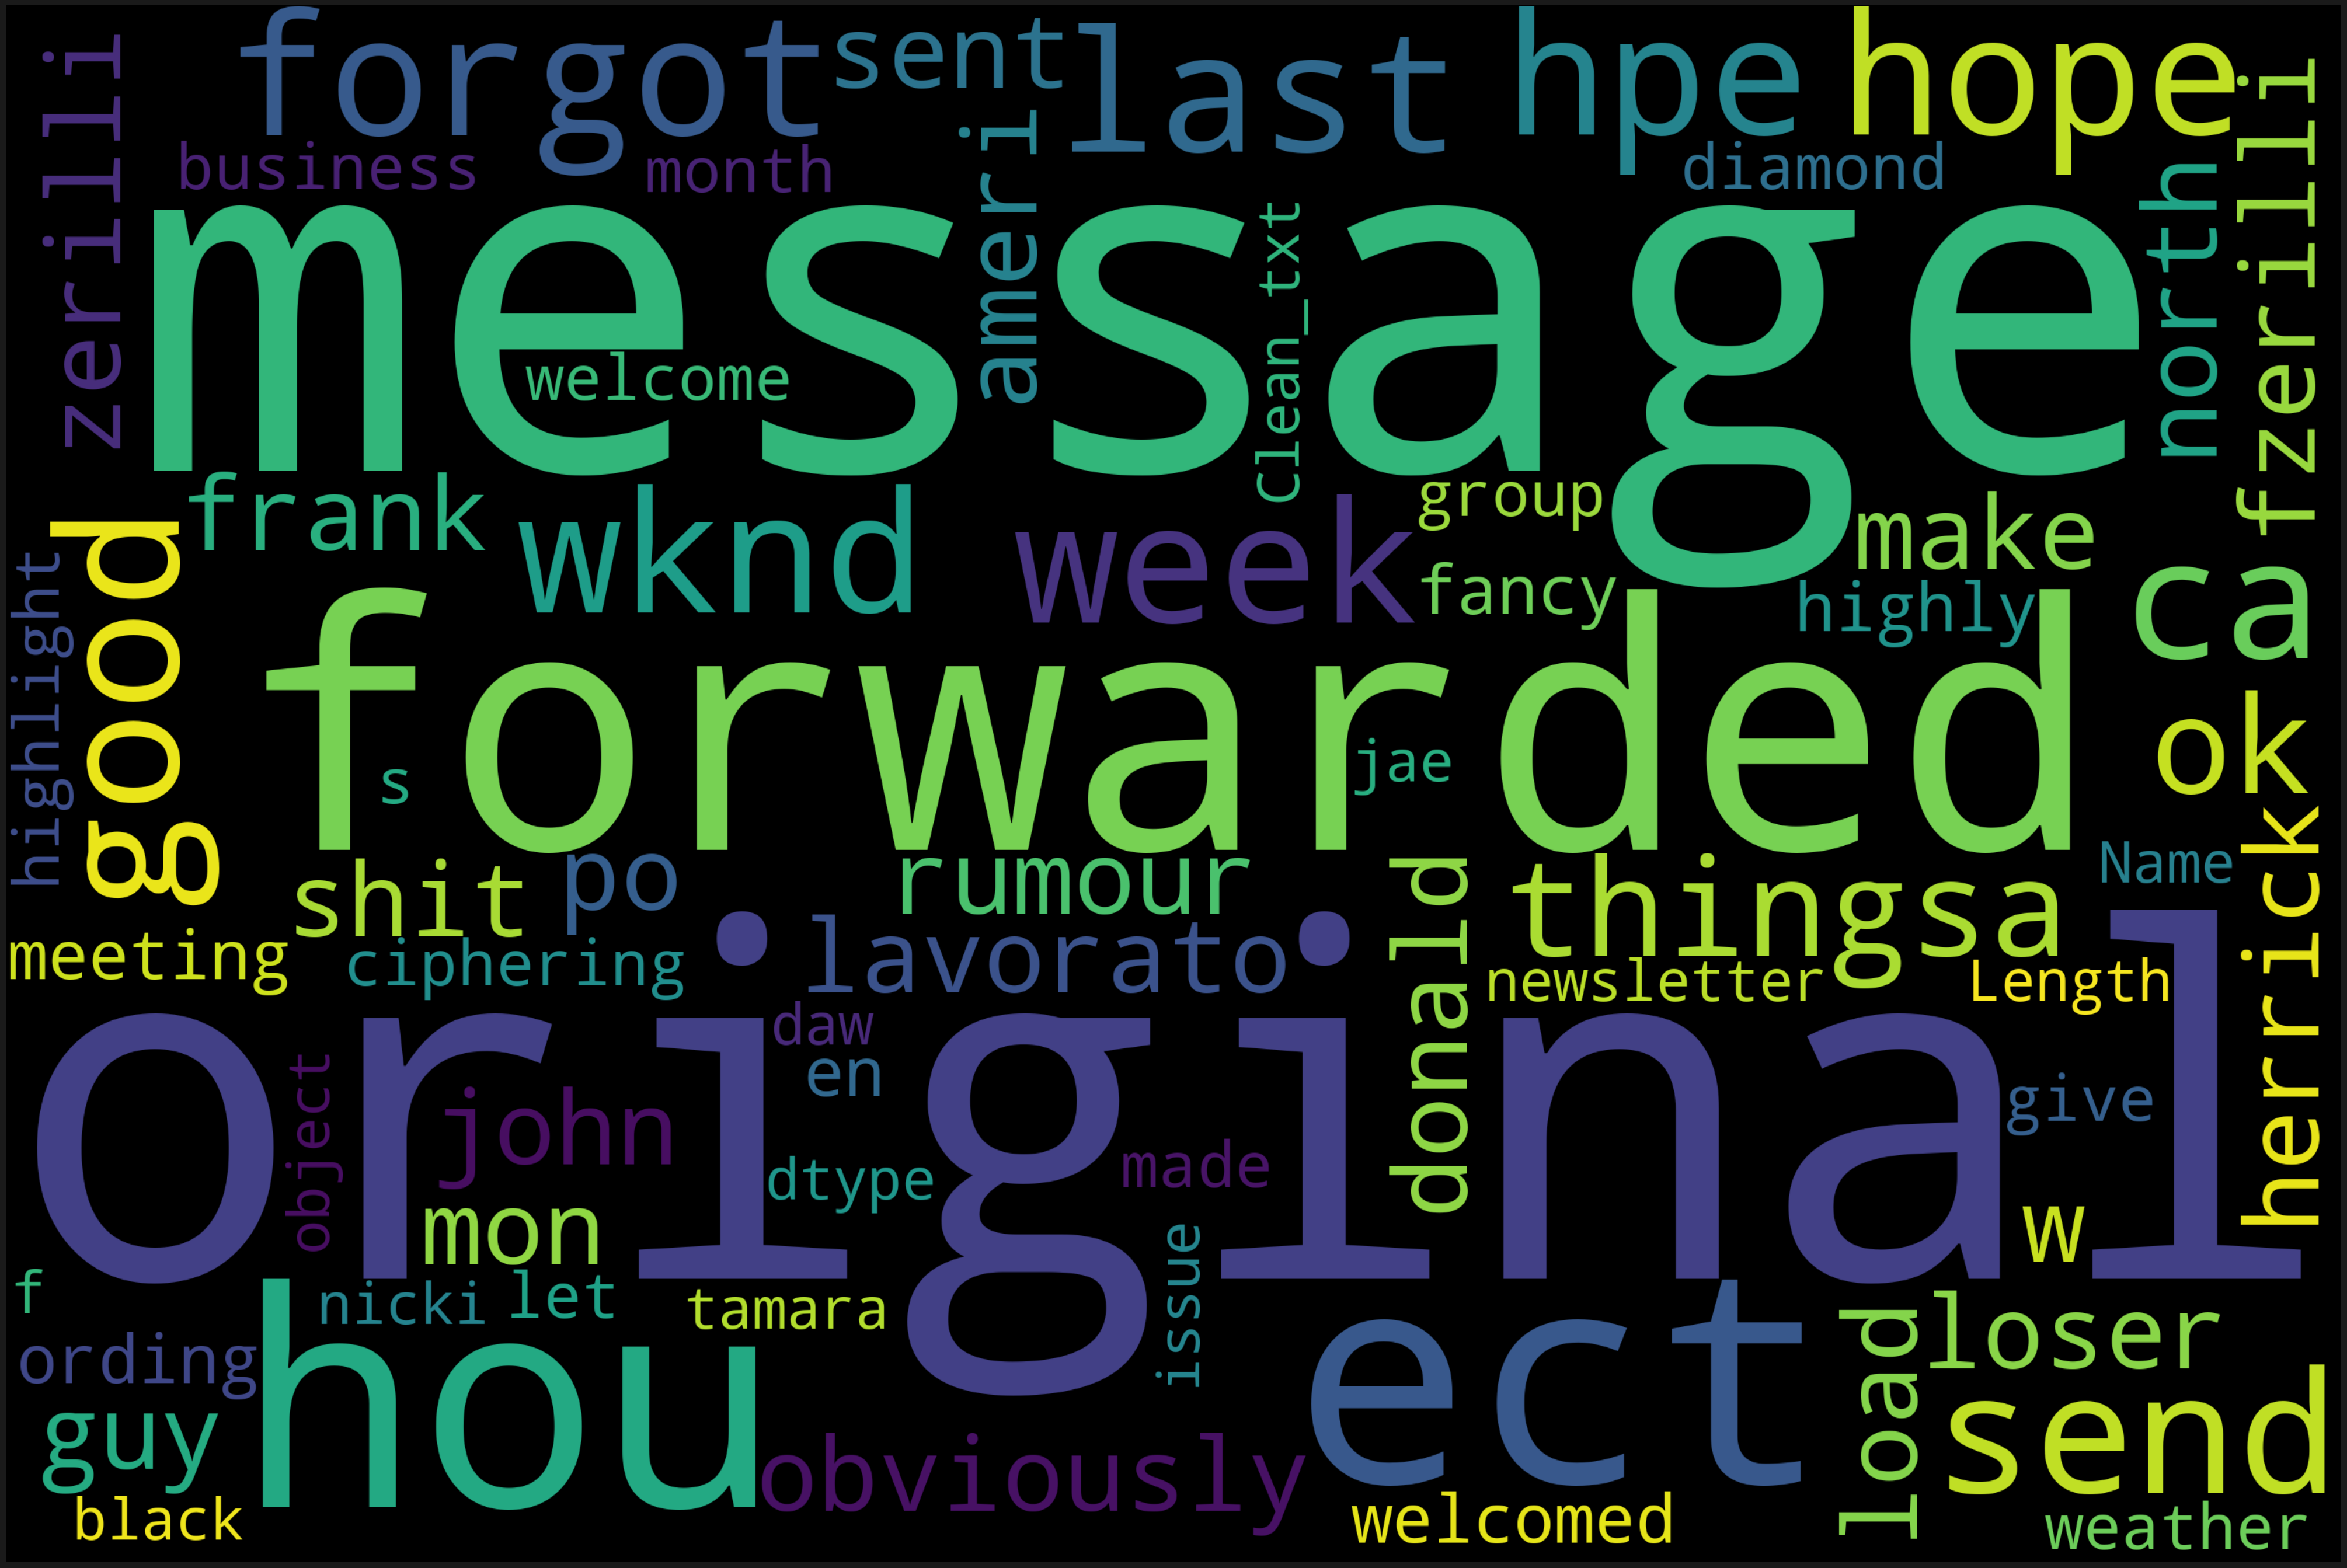

In [115]:
text = content_pos["Clean_txt"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Wordcloud-Neutral reviews:

##### Let's look at the word cloud of neutral reviews

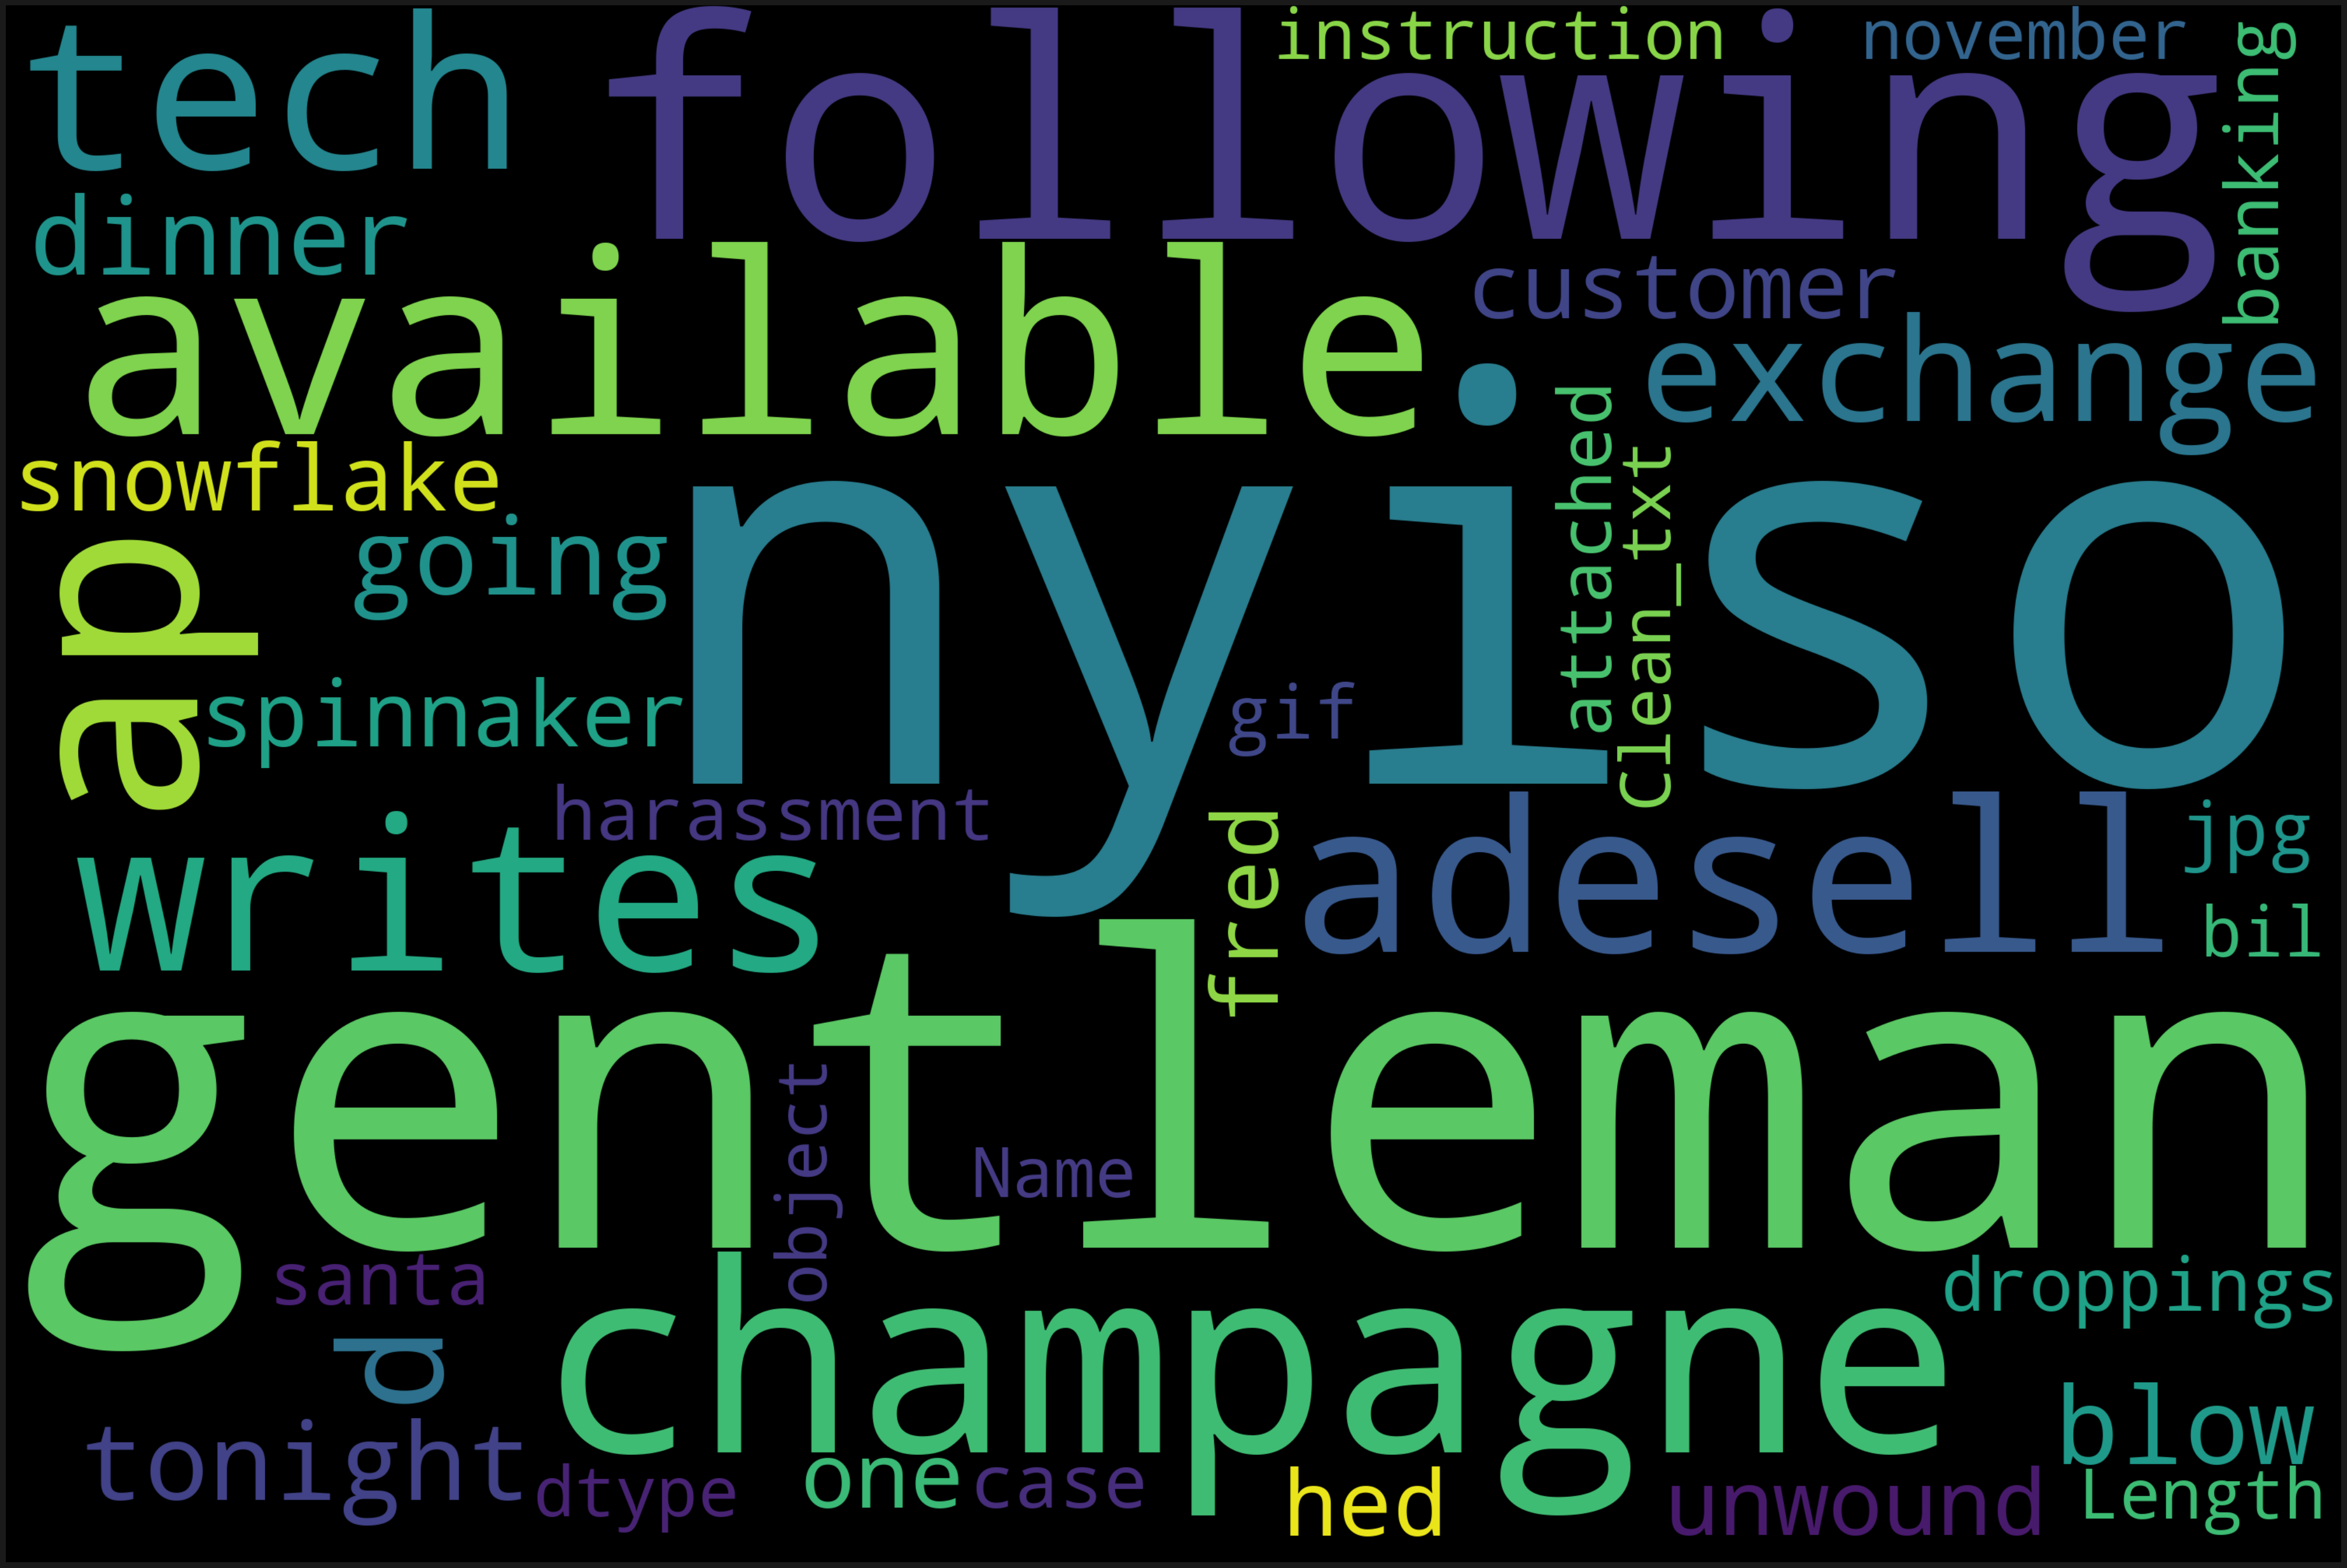

In [116]:
text = content_neu["Clean_txt"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Wordcloud-Negative reviews:

##### Let's look at the word cloud of negative reviews

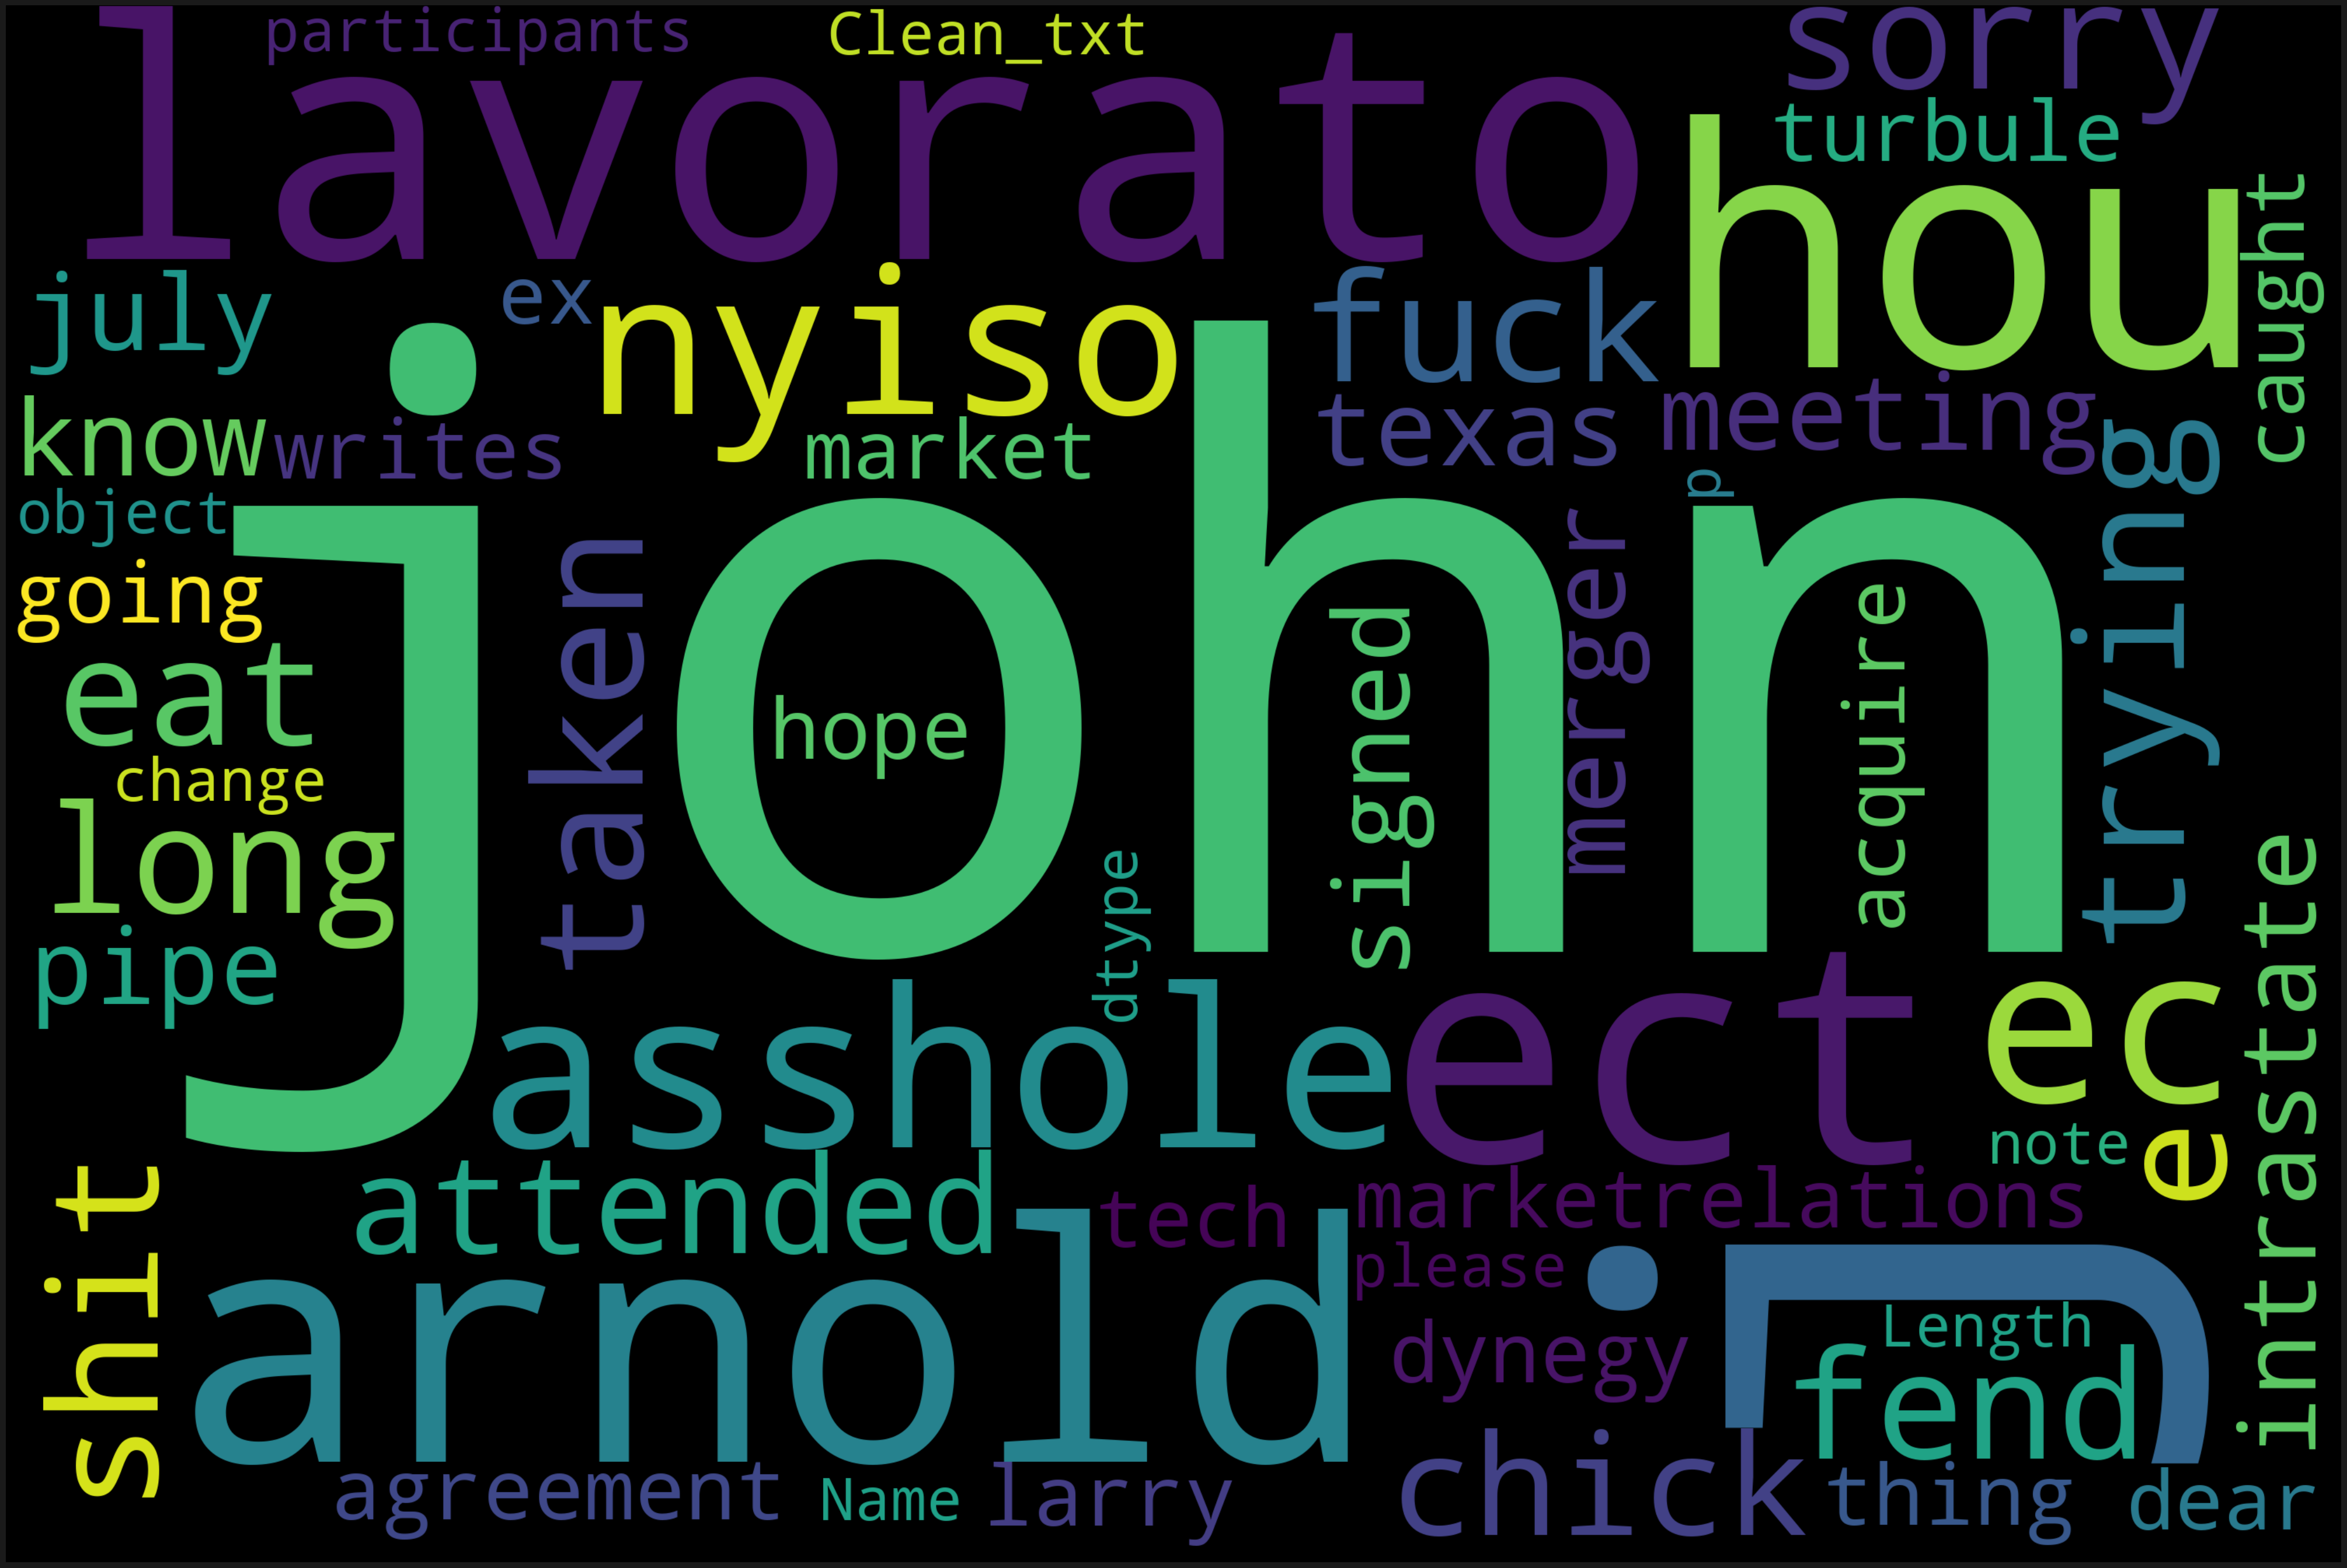

In [117]:
text = content_neg["Clean_txt"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [118]:
import plotly.offline as py
import plotly.graph_objs as go

score = df['sentiment'].value_counts()

labels = score.index
values = score.values

scores = go.Pie(labels = labels,
               values = values,
               hole = 0.25)

df_scores = [scores]

layout = go.Layout(
           title = 'Percentage of Positive, Negative and Neutral Sentiments')

fig = go.Figure(data = df_scores,
                 layout = layout)

py.iplot(fig)

## Plotting Ngrams:

documentNgrams, takes the clean reviews and computes n-grams of any size specified by the user. This function then packages the 15 most common n-grams into a pandas dataframe.

In [119]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

The function plotNgrams, computes n-grams of size 1, 2, and 3. Using each of the n-gram dataframes, it then creates three horizontal bar charts for each n-gram size.

In [120]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()


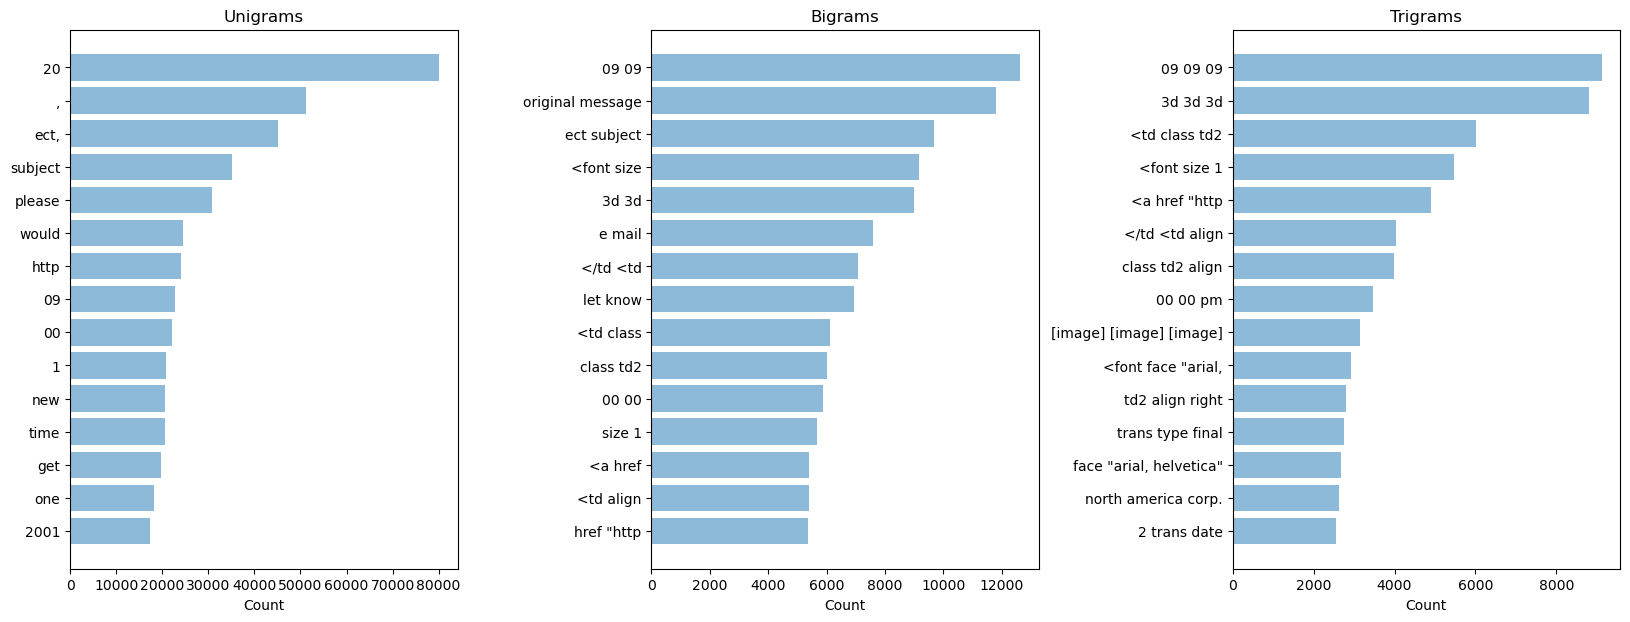

In [121]:
plotNgrams(df['Clean_txt'])

## Text Preprocessing:

In [122]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(df['Clean_txt'])

## Handling Imbalanced Dataset:

Text(0, 0.5, 'Frequency')

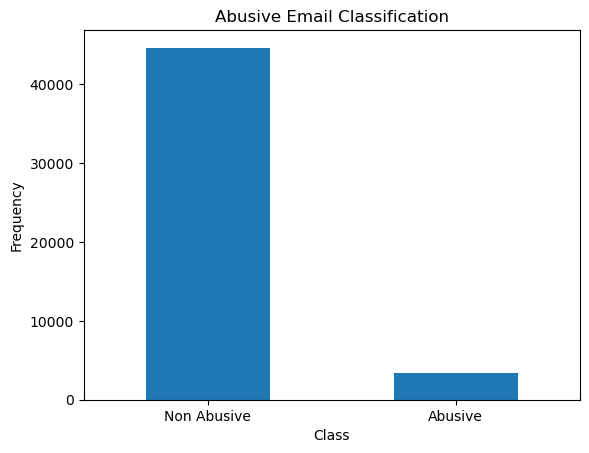

In [123]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Abusive Email Classification")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [124]:
Abusive = data[data['Class']=='Abusive']

Non_Abusive = data[data['Class']=='Non Abusive']

In [125]:
print(Abusive.shape,Non_Abusive.shape)

(3410, 5) (44666, 5)


##### We see that the output class is imbalanced.

In [126]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

### Defining the dependent feature:

In [127]:
y=df['Class']

In [128]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [129]:
print(X_res.shape,y_res.shape)

(89332, 5000) (89332,)


#### The dataset is balanced.